In [1]:
import os

data_dir = "/kaggle/input/utkface-new"  
files = os.listdir(data_dir)  


In [2]:
import os

data_dir = "/kaggle/input/utkface-new"

for folder in ["UTKFace", "utkface_aligned_cropped", "crop_part1"]:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):  
        files = os.listdir(folder_path)[:5]  
        print(f"📂 {folder} First 5 files in the folder: {files}")




📂 UTKFace First 5 files in the folder: ['26_0_2_20170104023102422.jpg.chip.jpg', '22_1_1_20170112233644761.jpg.chip.jpg', '21_1_3_20170105003215901.jpg.chip.jpg', '28_0_0_20170117180555824.jpg.chip.jpg', '17_1_4_20170103222931966.jpg.chip.jpg']
📂 utkface_aligned_cropped First 5 files in the folder: ['UTKFace', 'crop_part1']
📂 crop_part1 First 5 files in the folder: ['26_0_2_20170104023102422.jpg.chip.jpg', '21_1_3_20170105003215901.jpg.chip.jpg', '17_1_4_20170103222931966.jpg.chip.jpg', '76_0_0_20170104213515132.jpg.chip.jpg', '18_1_0_20170104022856102.jpg.chip.jpg']


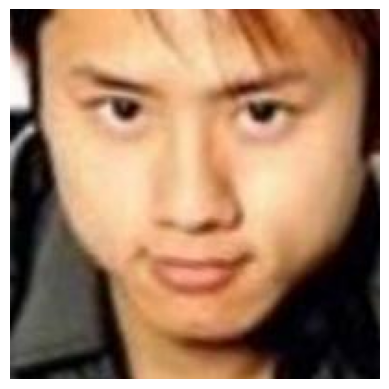

In [3]:
import matplotlib.pyplot as plt
import cv2
import os


image_dir = "/kaggle/input/utkface-new/UTKFace" 
image_files = os.listdir(image_dir)


sample_image = os.path.join(image_dir, image_files[0])
image = cv2.imread(sample_image)

if image is None:
    print(f"❌ Image could not be read: {sample_image}")
else:
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
   
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [4]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten, Input
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

path = "/kaggle/input/utkface-new/UTKFace"
images = []

gender = []
for img in os.listdir(path):
    
    genders = img.split("_")[1]
    img = cv2.imread(str(path) + "/" + str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128)) 
    images.append(np.array(img))
   
    gender.append(np.array(genders))


images = np.array(images,dtype="uint8") 
images = images.astype("float32")  / 255.0


gender = np.array(gender, np.uint64)



x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)


2025-07-06 18:21:36.181582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751826096.373385      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751826096.427017      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.5))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_gender = gender_model.fit(x_train_gender, y_train_gender,
                                  validation_data=(x_test_gender, y_test_gender), epochs=50, batch_size=32, callbacks=[early_stop])

gender_model.save('gender_model_50epochs.h5')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751826244.746831      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751826244.747478      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1751826257.499848      64 service.cc:148] XLA service 0x7e173400ad80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751826257.500457      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751826257.500482      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751826257.908077      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/556 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5084 - loss: 0.6981

I0000 00:00:1751826262.078636      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


556/556 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5579 - loss: 0.6727 - val_accuracy: 0.7157 - val_loss: 0.5661
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7265 - loss: 0.5494 - val_accuracy: 0.8066 - val_loss: 0.4034
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8153 - loss: 0.4076 - val_accuracy: 0.8360 - val_loss: 0.3525
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8400 - loss: 0.3578 - val_accuracy: 0.8515 - val_loss: 0.3196
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8558 - loss: 0.3297 - val_accuracy: 0.8620 - val_loss: 0.2993
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8708 - loss: 0.2988 - val_accuracy: 0.8784 - val_loss: 0.2811
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8760 - loss: 0.2880 - val_accuracy: 0.8709 - val_loss: 0.2914
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8751 - loss: 0.2858 - val_accurac

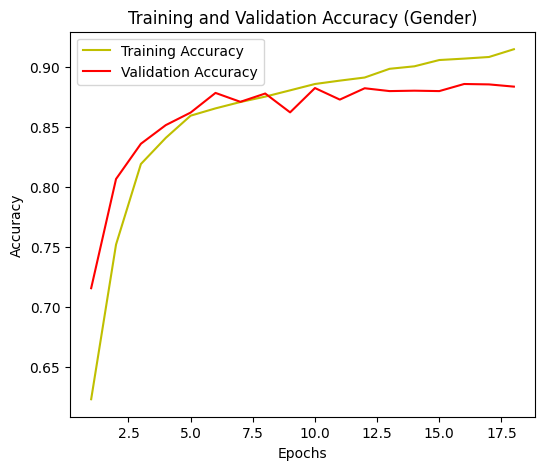

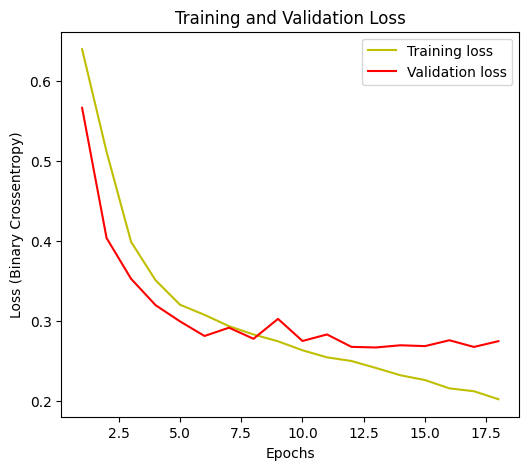

In [6]:

history = history_gender  

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(6, 5))
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Gender)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy =  0.8798717732411


<Axes: >

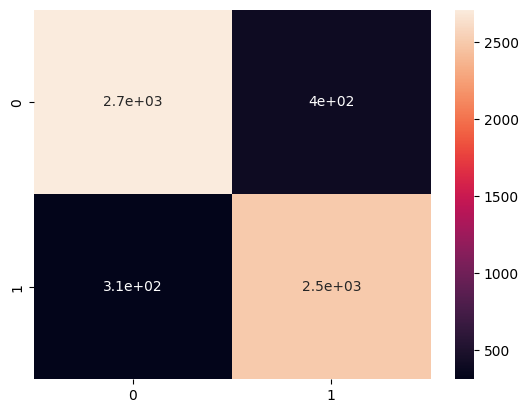

In [7]:
####################################################################
from keras.models import load_model

# Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)

predictions = my_model.predict(x_test_gender)
y_pred = (predictions >= 0.5).astype(int)[:, 0]

from sklearn import metrics

print("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_gender, y_pred)
sns.heatmap(cm, annot=True)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


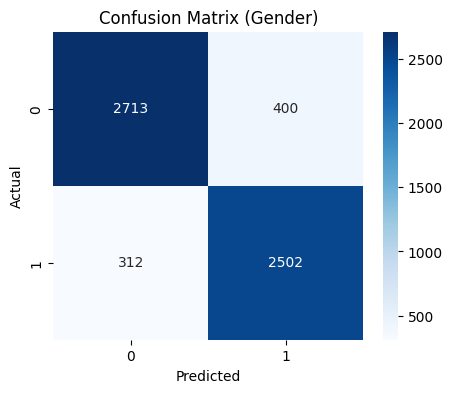


Classification Report (Gender):
              precision    recall  f1-score   support

      Female       0.90      0.87      0.88      3113
        Male       0.86      0.89      0.88      2814

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



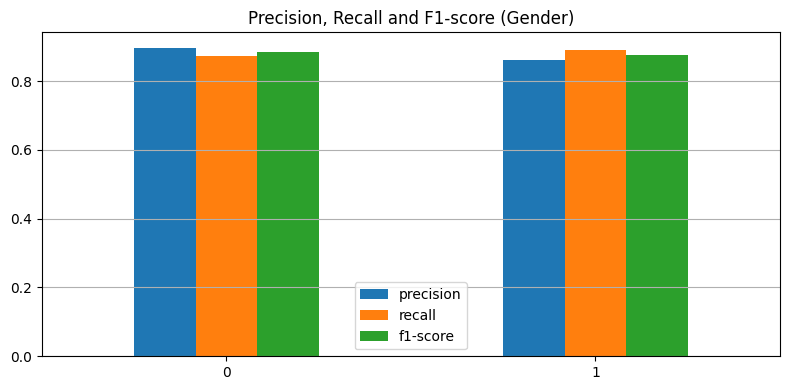

In [8]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_gender = gender_model.predict(x_test_gender)
y_pred_gender_binary = (y_pred_gender >= 0.5).astype(int)[:, 0]

cm = confusion_matrix(y_test_gender, y_pred_gender_binary)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gender)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report (Gender):")
print(classification_report(y_test_gender, y_pred_gender_binary, target_names=["Female", "Male"]))

# Barplot of Precision, Recall, F1-score
report = classification_report(y_test_gender, y_pred_gender_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.iloc[:2, :3].plot(kind='bar', figsize=(8, 4))
plt.title("Precision, Recall and F1-score (Gender)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()